# 笑脸识别
### 这是Ng提供的数据，通过tf.keras搭建的一个简单的CNN看看效果如何

In [2]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model
import tensorflow as tf

### 加载数据函数

In [3]:
def load_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #训练集图片
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  #训练集标签

    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #测试集图片
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) #测试集标签

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

### 加载数据

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)
[0]


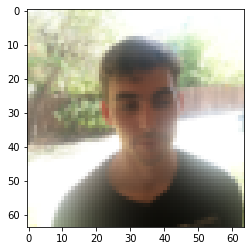

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

#看一下样本图片
index = 7
plt.imshow(X_train[index])
print(Y_train[index])

### class 搭建模型

In [5]:
class smile(Model):
    def __init__(self):
        super(smile, self).__init__()
        self.c1 = Conv2D(filters=32, kernel_size=(7, 7), padding='same')  # 卷积层
        self.b1 = BatchNormalization()  # BN层
        self.a1 = Activation('relu')  # 激活层
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=1, padding='same')  # 池化层
           
        self.flatten = Flatten()
        self.f1 = Dense(1, activation='sigmoid')
    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.flatten(x)
        y = self.f1(x)
        return y

### 运行模型

Epoch 1/40
12/12 - 2s - loss: 15.3806 - accuracy: 0.5100 - val_loss: 4.6139 - val_accuracy: 0.4400
Epoch 2/40
12/12 - 2s - loss: 4.1162 - accuracy: 0.6467 - val_loss: 2.4090 - val_accuracy: 0.5400
Epoch 3/40
12/12 - 2s - loss: 1.1403 - accuracy: 0.8150 - val_loss: 2.3675 - val_accuracy: 0.5867
Epoch 4/40
12/12 - 2s - loss: 0.5947 - accuracy: 0.9167 - val_loss: 1.9721 - val_accuracy: 0.5400
Epoch 5/40
12/12 - 2s - loss: 0.3403 - accuracy: 0.9117 - val_loss: 2.2992 - val_accuracy: 0.5333
Epoch 6/40
12/12 - 3s - loss: 0.1658 - accuracy: 0.9500 - val_loss: 1.8627 - val_accuracy: 0.5467
Epoch 7/40
12/12 - 2s - loss: 0.1055 - accuracy: 0.9717 - val_loss: 1.2622 - val_accuracy: 0.5600
Epoch 8/40
12/12 - 3s - loss: 0.0771 - accuracy: 0.9833 - val_loss: 1.1535 - val_accuracy: 0.5867
Epoch 9/40
12/12 - 2s - loss: 0.1096 - accuracy: 0.9700 - val_loss: 1.0267 - val_accuracy: 0.6067
Epoch 10/40
12/12 - 2s - loss: 0.0731 - accuracy: 0.9783 - val_loss: 1.2033 - val_accuracy: 0.6533
Epoch 11/40
12/12 

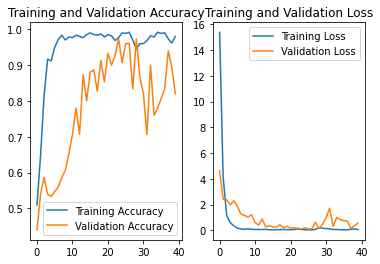

In [6]:
model = smile()

model.compile("adam","binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=50, epochs=40,validation_data=(X_test, Y_test), validation_freq=1,verbose=2)

model.summary()

# 显示训练集和验证集的acc和loss曲线
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### 用测试集检验模型

input the number of test pictures:3
the index of test picture(0-149):4


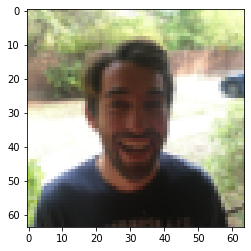

the human is not smiling
the index of test picture(0-149):6


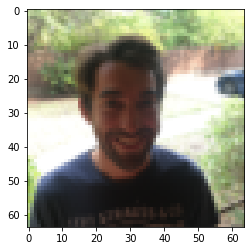

the human is smiling
the index of test picture(0-149):78


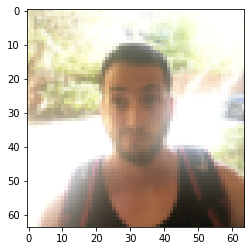

the human is not smiling


In [7]:
preNum = int(input("input the number of test pictures:"))

for i in range(preNum):
    index = input("the index of test picture(0-149):")
    index = int(index)
    plt.imshow(X_test[index])
    plt.show()
    image = X_test[index][tf.newaxis, ...]
    result = model.predict(image) 
    if result > 0.5:
        face = "smiling"
    else :
        face = "not smiling"
    print("the human is "+face)